In [1]:
import numpy as np
import pandas as pd
import math
import sys
import copy
import glob
import os
from PlotUtility import *
from DataUtility import *

In [2]:
dataPath = "../Assets/HandData/"
mergedDataPath = MergeJsonAndLabel(dataPath, "./")

In [3]:
dataset = Dataset(mergedDataPath, Debug=True)

   Label  Hand  IndexCurl  MiddleCurl  RingCurl  PinkyCurl  ThumbCurl  \
0      1     1   0.585899    0.748077  0.829552   0.841716   0.557624   
1      1     1   0.585899    0.748077  0.829552   0.841716   0.557624   
2      1     1   0.585899    0.748077  0.829552   0.841716   0.557624   
3      1     1   0.585899    0.748077  0.829552   0.841716   0.557624   
4      1     1   0.585899    0.748077  0.829552   0.841716   0.557624   

   NoneXRotation  NoneYRotation  NoneZRotation  ...  PinkyTipZUp  \
0              0              0              0  ...     0.406831   
1              0              0              0  ...     0.406831   
2              0              0              0  ...     0.406831   
3              0              0              0  ...     0.406831   
4              0              0              0  ...     0.406831   

   PinkyTipXRight  PinkyTipYRight  PinkyTipZRight  PinkyTipXLocalRotation  \
0        0.994445       -0.099223        0.035125                24.09536  

In [4]:
# Qs = [1,2,3,4,5]
Qs = [1]
for q in Qs:
    dataset.AddPolynomialFeatures(q)
dataset.trainY.mean()
dataset.trainX

,Hand,IndexCurl,MiddleCurl,RingCurl,PinkyCurl,ThumbCurl,NoneXRotation,NoneYRotation,NoneZRotation,NoneXPosition,...,PinkyTipZUp,PinkyTipXRight,PinkyTipYRight,PinkyTipZRight,PinkyTipXLocalRotation,PinkyTipYLocalRotation,PinkyTipZLocalRotation,PinkyTipXLocalPosition,PinkyTipYLocalPosition,PinkyTipZLocalPosition
0,1,0.531940,0.635237,0.712352,0.750382,0.198814,0,0,0,26.637250,...,-0.867083,0.510050,-0.712330,0.482115,328.66360,98.44425,236.5103,26.651080,2.717193,12.141580
1,1,0.585898,0.748078,0.829552,0.841716,0.557624,0,0,0,-0.177469,...,0.006426,0.235876,-0.098197,0.966809,23.24590,106.14010,186.1351,-0.505983,-0.065234,-0.137581
2,1,0.531951,0.635224,0.712364,0.750389,0.198811,0,0,0,13.731280,...,0.604201,-0.633487,-0.743228,0.215190,327.99440,334.78970,241.2173,13.289000,2.058627,10.165630
3,1,0.585899,0.748078,0.829552,0.841716,0.557624,0,0,0,0.298177,...,0.218533,0.326884,-0.098860,-0.939879,23.79280,253.33310,186.2025,0.676542,-0.052885,-0.370797
4,1,0.585898,0.748076,0.829553,0.841716,0.557624,0,0,0,5.160250,...,-0.072082,-0.354244,-0.101500,-0.929628,26.04994,293.71850,186.4870,5.462648,-0.145927,-1.803029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,1,0.014464,0.004636,0.018854,0.034514,0.353202,0,0,0,21.706080,...,-0.569994,0.558544,-0.130617,-0.819126,278.69560,115.18490,300.2369,22.243390,0.168856,6.155048
1283,1,0.531948,0.635229,0.712368,0.750406,0.198810,0,0,0,29.480000,...,-0.682934,0.717801,-0.694816,-0.044637,329.07950,148.20100,234.0882,29.867410,2.584417,2.845106
1284,1,0.585898,0.748077,0.829551,0.841716,0.557624,0,0,0,1.575945,...,-0.054845,-0.321109,-0.101165,-0.941623,25.75641,291.64240,186.4493,1.886329,-0.109997,-1.034458
1285,1,0.531941,0.635225,0.712356,0.750389,0.198808,0,0,0,16.587890,...,-0.045754,-0.332230,-0.724479,0.603947,328.38950,20.87876,238.2875,16.096980,2.374710,15.178790


In [5]:
# len(dataset.polynomialFeatureNames[2])

In [6]:

CVals = [0.01,0.1,1,10,100,1000]
KVals = np.arange(1,101,2)
ModelTypes = ["Lasso", "Ridge", "KNN"]
# ModelTypes = ["KNN"]

Lasso Q = 1


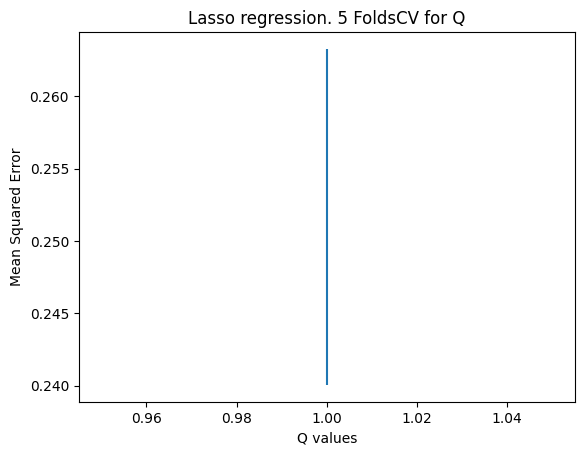

Ridge Q = 1


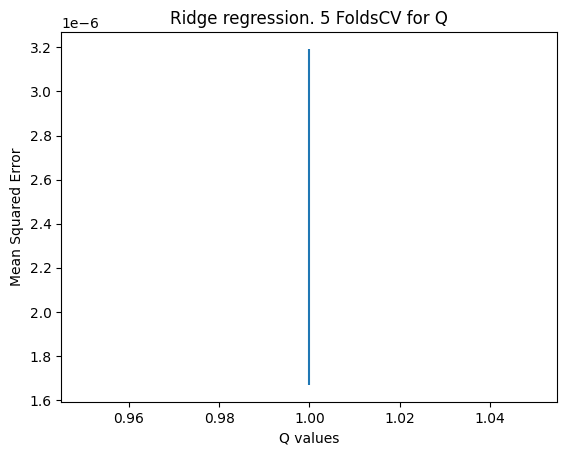

K = 1
K = 3
K = 5
K = 7
K = 9
K = 11
K = 13
K = 15
K = 17
K = 19
K = 21
K = 23
K = 25
K = 27
K = 29
K = 31
K = 33
K = 35
K = 37
K = 39
K = 41
K = 43
K = 45
K = 47
K = 49
K = 51
K = 53
K = 55
K = 57
K = 59
K = 61
K = 63
K = 65
K = 67
K = 69
K = 71
K = 73
K = 75
K = 77
K = 79
K = 81
K = 83
K = 85
K = 87
K = 89
K = 91
K = 93
K = 95
K = 97
K = 99


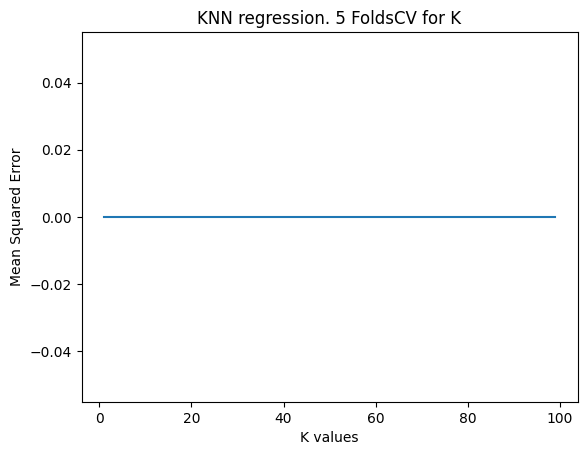

In [7]:
Models = []
defaultC = 1
# choose q then choose c
for mType in ModelTypes:
    mse = []
    std = []
    hyperparameterLabel = ""
    hyperparameterList = []
    if mType == "KNN":
        hyperparameterLabel = "K"
        hyperparameterList = KVals
        for k in KVals:
            print("K =",k)
            m = MLModel()
            x = dataset.trainXScaled
            y = dataset.trainY
            currMSE, currSTD = m.KFoldsValidation(mType,x,y,k)
            mse.append(currMSE)
            std.append(currSTD)
            Models.append(m)
    else:
        hyperparameterLabel = "Q"
        hyperparameterList = Qs
        for q in dataset.trainxPolys:
            print(mType, "Q =", q)
            m = MLModel()
            x = dataset.trainxPolysScaled[q]
            y = dataset.trainY
            currMSE, currSTD = m.KFoldsValidation(mType,x,y,defaultC)
            mse.append(currMSE)
            std.append(currSTD)
            Models.append(m)
            
    MeanSquareErrorPlot(mType + " regression. 5 FoldsCV for " + hyperparameterLabel, hyperparameterLabel + " values", hyperparameterList, mse, std)

In [9]:
for m in Models:
    m.ExportModelToONNX()

C:\Users\Matthew Radtke\AppData\Local\Programs\Python\Python310\lib\site-packages\skl2onnx\algebra\onnx_ops.py:159: UserWarning: OpSchema.FormalParameter.typeStr is deprecated and will be removed in 1.16. Use OpSchema.FormalParameter.type_str instead.
  tys = obj.typeStr or ''
C:\Users\Matthew Radtke\AppData\Local\Programs\Python\Python310\lib\site-packages\skl2onnx\algebra\automation.py:154: UserWarning: OpSchema.FormalParameter.isHomogeneous is deprecated and will be removed in 1.16. Use OpSchema.FormalParameter.is_homogeneous instead.
  if getattr(obj, 'isHomogeneous', False):
C:\Users\Matthew Radtke\AppData\Local\Programs\Python\Python310\lib\site-packages\jinja2\environment.py:485: UserWarning: OpSchema.FormalParameter.typeStr is deprecated and will be removed in 1.16. Use OpSchema.FormalParameter.type_str instead.
  return getattr(obj, attribute)


ValueError: Initial types are required. See usage of convert(...) in skl2onnx.convert for details